In [ ]:
!pip install --upgrade imutils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!wget https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
!unzip -qq facial-landmarks.zip
%cd facial-landmarks

--2022-05-30 06:28:18--  https://pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com/facial-landmarks/facial-landmarks.zip
Resolving pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)... 52.218.132.17
Connecting to pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com (pyimagesearch-code-downloads.s3-us-west-2.amazonaws.com)|52.218.132.17|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 74572347 (71M) [binary/octet-stream]
Saving to: ‘facial-landmarks.zip’

facial-landmarks.zi 100%[===================>]  71.12M  32.9MB/s    in 2.2s    

2022-05-30 06:28:21 (32.9 MB/s) - ‘facial-landmarks.zip’ saved [74572347/74572347]

/content/facial-landmarks


In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/capstone project")

In [ ]:
from keras.layers import Input, Conv2D, Lambda, merge, Dense, Flatten,MaxPooling2D,Activation, Dropout
from keras.models import Model, Sequential
from keras.regularizers import l2
from keras import backend as K
from tensorflow.keras.optimizers import Adam
from skimage.io import imshow
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import numpy as np
from keras.preprocessing import image

In [ ]:
nameDir = [name for name in os.listdir('Nose_model/proc_images/')]
folderlist = []
for fname in nameDir:
    path='/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/proc_images/'+fname+'/'
    folderlist.append(path)

In [ ]:
folderlist[2]

'/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/proc_images/Amitabh Bachchan/'

In [ ]:
left_input_name = []
right_input_name = []
targets = []

In [ ]:
# for i in range(0, 29):
#   fnamei = [folderlist[i] + name for name in os.listdir(folderlist[i])]
#   for j in range(1,10):
#     for k in range(j):
#       left_input_name.append(fnamei[j])
#       right_input_name.append(fnamei[k])
#       targets.append(1)

In [ ]:
for i in range(0, 29):
  fnamei = [folderlist[i] + name for name in os.listdir(folderlist[i])]
  tempSet = set([])
  while len(tempSet) < 153:
    y1 = random.randint(0,len(fnamei)-1)
    y2 = random.randint(0,len(fnamei)-1)
    if y1 == y2:
      continue
    myTuple = (y1, y2)
    if myTuple in tempSet:
      continue
    myTuple2 = (y2, y1)
    if myTuple2 in tempSet:
      continue
    tempSet.add(myTuple)
    left_input_name.append(fnamei[y1])
    right_input_name.append(fnamei[y2])
    targets.append(1)

In [ ]:
len(targets)

4437

In [ ]:
mySet = set([])
while len(mySet) < 4437:
  x1 = random.randint(0,28)
  x2 = random.randint(0,28)
  if x1 == x2:
    continue
  fname1 = [folderlist[x1] + name for name in os.listdir(folderlist[x1])]
  fname2 = [folderlist[x2] + name for name in os.listdir(folderlist[x2])]
  y1 = random.randint(0,len(fname1)-1)
  y2 = random.randint(0,len(fname2)-1)
  myTuple = (x1,y1,x2,y2)
  if myTuple in mySet:
    continue
  myTuple2 = (x2,y2,x1,y1)
  if myTuple2 in mySet:
    continue
  mySet.add(myTuple)
  left_input_name.append(fname1[y1])
  right_input_name.append(fname2[y2])
  targets.append(0)

In [ ]:
len(mySet)

4437

In [ ]:
len(targets)

8874

In [ ]:
targets_array = np.squeeze(np.array(targets))
targets_array

array([1, 1, 1, ..., 0, 0, 0])

In [ ]:
targets_array = targets_array.astype('float64')
targets_array

array([1., 1., 1., ..., 0., 0., 0.])

In [ ]:
left_input_data = np.array([image.img_to_array(image.load_img(fname, target_size=(80, 80))) for fname in left_input_name])
left_input_data = np.squeeze(left_input_data)
left_input_data.shape

(8874, 80, 80, 3)

In [ ]:
right_input_data = np.array([image.img_to_array(image.load_img(fname, target_size=(80, 80))) for fname in right_input_name])
right_input_data = np.squeeze(right_input_data)
right_input_data.shape

(8874, 80, 80, 3)

In [ ]:
BASE_PATH = "/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model"

In [ ]:
file_name = "left_input_data"
np.save(os.path.join(BASE_PATH, file_name), left_input_data)

In [ ]:
file_name = "right_input_data"
np.save(os.path.join(BASE_PATH, file_name), right_input_data)

In [ ]:
file_name = "targets_array"
np.save(os.path.join(BASE_PATH, file_name), targets_array)

In [ ]:
left_input_data = np.load('/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/left_input_data.npy')
right_input_data = np.load('/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/right_input_data.npy')
targets_array = np.load('/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/targets_array.npy')

In [ ]:
left_input_data = left_input_data/255
right_input_data = right_input_data/255

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
lid_train, lid_test, rid_train, rid_test, y_train, y_test = train_test_split(left_input_data, right_input_data, targets_array, test_size=0.10, random_state=42)

In [ ]:
def initialize_weights(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer weights with mean as 0.0 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.0, scale = 1e-2, size = shape)

In [ ]:
def initialize_bias(shape, dtype=None):
    """
        The paper, http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
        suggests to initialize CNN layer bias with mean as 0.5 and standard deviation of 0.01
    """
    return np.random.normal(loc = 0.5, scale = 1e-2, size = shape)

In [ ]:
def get_siamese_model(input_shape):
    """
        Model architecture based on the one provided in: http://www.cs.utoronto.ca/~gkoch/files/msc-thesis.pdf
    """
    
    # Define the tensors for the two input images
    left_input = Input(input_shape)
    right_input = Input(input_shape)
    
    # Convolutional Neural Network
    model = Sequential()
    model.add(Conv2D(64, (10,10), activation='relu', input_shape=input_shape,
                   kernel_initializer=initialize_weights, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (7,7), activation='relu',
                     kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(128, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(MaxPooling2D())
    model.add(Conv2D(256, (4,4), activation='relu', kernel_initializer=initialize_weights,
                     bias_initializer=initialize_bias, kernel_regularizer=l2(2e-4)))
    model.add(Flatten())
    model.add(Dense(4096, activation='sigmoid',
                   kernel_regularizer=l2(1e-3),
                   kernel_initializer=initialize_weights,bias_initializer=initialize_bias))
    
    # Generate the encodings (feature vectors) for the two images
    encoded_l = model(left_input)
    encoded_r = model(right_input)
    
    # Add a customized layer to compute the absolute difference between the encodings
    L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
    L1_distance = L1_layer([encoded_l, encoded_r])
    
    # Add a dense layer with a sigmoid unit to generate the similarity score
    prediction = Dense(1,activation='sigmoid',bias_initializer=initialize_bias)(L1_distance)
    
    # Connect the inputs with the outputs
    siamese_net = Model(inputs=[left_input,right_input],outputs=prediction)
    
    # return the model
    return siamese_net

In [ ]:
model = get_siamese_model((80, 80, 3))
model.summary()

NameError: ignored

In [ ]:
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = model.fit([lid_train,rid_train], y_train,
          batch_size=16,
          validation_split=0.1,
          epochs=50,
          verbose=1)

Epoch 1/50
450/450 [==============================] - 27s 35ms/step - loss: 0.8730 - val_loss: 0.7550
Epoch 2/50
450/450 [==============================] - 15s 34ms/step - loss: 0.7254 - val_loss: 0.7270
Epoch 3/50
450/450 [==============================] - 16s 35ms/step - loss: 0.6974 - val_loss: 0.7148
Epoch 4/50
450/450 [==============================] - 16s 35ms/step - loss: 0.6881 - val_loss: 0.6924
Epoch 5/50
450/450 [==============================] - 15s 34ms/step - loss: 0.6826 - val_loss: 0.6944
Epoch 6/50
450/450 [==============================] - 15s 34ms/step - loss: 0.6778 - val_loss: 0.6927
Epoch 7/50
450/450 [==============================] - 15s 34ms/step - loss: 0.6728 - val_loss: 0.6894
Epoch 8/50
450/450 [==============================] - 16s 35ms/step - loss: 0.6684 - val_loss: 0.6741
Epoch 9/50
450/450 [==============================] - 15s 34ms/step - loss: 0.6630 - val_loss: 0.6664
Epoch 10/50
450/450 [==============================] - 15s 34ms/step - loss: 0.658

In [ ]:
# save model to .h5 file
model.save("/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/siamese_network.h5")

In [ ]:
#Load model back from saved file
model = get_siamese_model((80, 80, 3))
optimizer = Adam(lr = 0.00006)
model.compile(loss="binary_crossentropy",optimizer=optimizer)
model.load_weights('/content/drive/My Drive/Colab Notebooks/capstone project/Nose_model/siamese_network.h5')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
prediction = model.predict([lid_test, rid_test])

NameError: ignored

In [ ]:
prediction = (model.predict([lid_test, rid_test]) > 0.5).astype("int32")

In [ ]:
prediction.shape

(888, 1)

In [ ]:
y_test.shape

(888,)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         0.0       0.94      0.84      0.89       450
         1.0       0.85      0.94      0.90       438

    accuracy                           0.89       888
   macro avg       0.90      0.89      0.89       888
weighted avg       0.90      0.89      0.89       888



In [ ]:
from matplotlib import pyplot as plt
from imutils import face_utils
import numpy as np
import argparse
import imutils
import dlib
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from keras.preprocessing import image
from PIL import Image

In [ ]:
def plt_imshow(title, image):
  # convert the image frame BGR to RGB color space and display it
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	plt.imshow(image)
	plt.title(title)
	plt.grid(False)
	plt.show()

In [ ]:
args = {
	"shape_predictor": "/content/facial-landmarks/shape_predictor_68_face_landmarks.dat",
	"image": "/content/facial-landmarks/images/example_01.jpg"
}

In [ ]:
# initialize dlib's face detector (HOG-based) and then create
# the facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(args["shape_predictor"])

In [ ]:
def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

In [ ]:
def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

In [ ]:
img1 = []
img2 = []

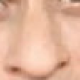

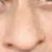

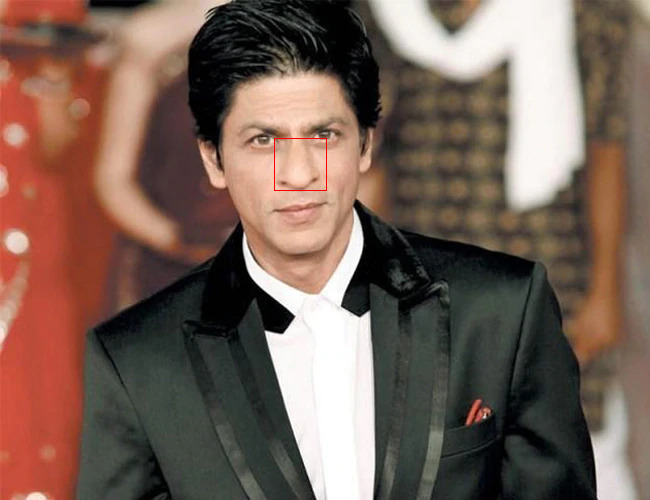

In [ ]:
path = "/content/drive/MyDrive/images/shah3.jpg"
image = cv2.imread(path)
height, width, channels = image.shape
if height < 500 and width < 500:
  print("Please use high res image")
# load the input image, resize it, and convert it to grayscale
# image = imutils.resize(image, width=500)
height, width, channels = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the facial landmark (x, y)-coordinates to a NumPy
  # array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

x_min,y_min = np.amin(shape[27:36], axis = 0)
x_max,y_max = np.amax(shape[27:36], axis = 0)

offsetX = (y_max-y_min - (x_max-x_min))/2
offsetX = int(offsetX)

img = cv2.cvtColor(image[y_min:y_max, x_min-offsetX:x_max+offsetX], cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)
img = crop_max_square(img)
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = imutils.resize(img, width=80, height=80)
cv2_imshow(img)

img1 = img

cv2_imshow(image[y_min:y_max, x_min-offsetX:x_max+offsetX])
cv2.rectangle(image, (x_min-offsetX, y_min), (x_max+offsetX, y_max), (0, 0, 250), 1)
cv2_imshow(image)

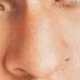

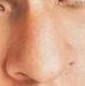

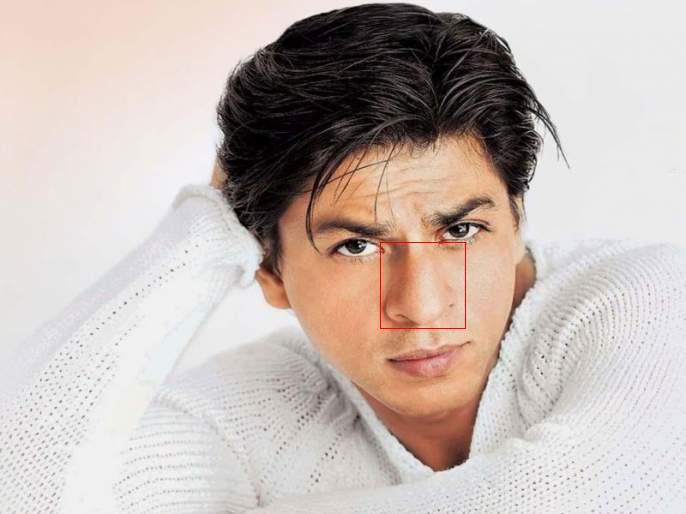

In [ ]:
path = "/content/drive/MyDrive/images/shah2.jpg"
image = cv2.imread(path)
height, width, channels = image.shape
if height < 500 and width < 500:
  print("Please use high res image")
# load the input image, resize it, and convert it to grayscale
# image = imutils.resize(image, width=500)
height, width, channels = image.shape
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# detect faces in the grayscale image
rects = detector(gray, 1)

# loop over the face detections
for (i, rect) in enumerate(rects):
  # determine the facial landmarks for the face region, then
  # convert the facial landmark (x, y)-coordinates to a NumPy
  # array
  shape = predictor(gray, rect)
  shape = face_utils.shape_to_np(shape)

x_min,y_min = np.amin(shape[27:36], axis = 0)
x_max,y_max = np.amax(shape[27:36], axis = 0)

offsetX = (y_max-y_min - (x_max-x_min))/2
offsetX = int(offsetX)

img = cv2.cvtColor(image[y_min:y_max, x_min-offsetX:x_max+offsetX], cv2.COLOR_BGR2RGB)
img = Image.fromarray(img)
img = crop_max_square(img)
img = cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)
img = imutils.resize(img, width=80, height=80)
cv2_imshow(img)

img2 = img

cv2_imshow(image[y_min:y_max, x_min-offsetX:x_max+offsetX])
cv2.rectangle(image, (x_min-offsetX, y_min), (x_max+offsetX, y_max), (0, 0, 250), 1)
cv2_imshow(image)

In [ ]:
img1 = np.expand_dims(img1, axis=0)
img1.shape

(1, 80, 80, 3)

In [ ]:
img2 = np.expand_dims(img2, axis=0)
img2.shape

(1, 80, 80, 3)

In [ ]:
predTest = (model.predict([img1, img2]) > 0.5).astype("int32")

In [ ]:
predTest

array([[1]], dtype=int32)